In [13]:
# import cv2
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt 
# def apply_oil_painting_effect(input_image_path, output_image_path):
#     # Read the image
#     original_image = cv2.imread(input_image_path)
#     # i want to show mmore than one image
#     plt.subplot(1,2,1)
#     plt.imshow(original_image)
#     plt.title('original image')

#     # Check if image is loaded
#     if original_image is None:
#         print("Can't read the image file.")
#         return

#     # Convert the image to grayscale
#     gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

#     # Apply gaussian blur to the grayscale image
#     blurred_image = cv2.GaussianBlur(gray_image, (21, 21), 0)

#     # Detect edges in the image and invert the binary image
#     edges = cv2.adaptiveThreshold(blurred_image, 255,
#                                   cv2.ADAPTIVE_THRESH_MEAN_C,
#                                   cv2.THRESH_BINARY, 9, 9)

#     # Convert back to color
#     colored_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

#     # Create the 'oil painting' effect by bitwise_and operation with the inverted edges
#     oil_painting_effect = cv2.bitwise_and(original_image, colored_edges)
#     plt.subplot(1,2,2)
#     plt.imshow(oil_painting_effect)
#     plt.title('oil painting effect')
#     # Save the final image
#     cv2.imwrite(output_image_path, oil_painting_effect)

#     print(f"Saved: {output_image_path}")



In [1]:
import cv2
import numpy as np

def apply_advanced_oil_painting_effect(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)
    
    # Check if image is loaded
    if original_image is None:
        print("Can't read the image file.")
        return

    # Stylization of the image gives a base "painting" effect
    stylized_effect = cv2.stylization(original_image, sigma_s=60, sigma_r=0.6)

    # Now, let's enhance edges in the image to simulate brush strokes.
    # First, we need a grayscale version of our stylized image.
    gray_image = cv2.cvtColor(stylized_effect, cv2.COLOR_BGR2GRAY)
    
    # Applying a combination of GaussianBlur and Laplacian filter to enhance edges.
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    edges = cv2.Laplacian(blurred_image, cv2.CV_8U, ksize=5)
    edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # Inverting the colors in the edge image will help in adding it as a mask over the stylized image.
    edges_inverted = cv2.bitwise_not(edges_colored)

    # To blend the edges with the original image, we'll use the bitwise 'and' operation.
    # This will darken the areas of the original image that correspond to the edges, giving a more painted look.
    combined_result = cv2.bitwise_and(stylized_effect, edges_inverted)

    # Save the final image
    cv2.imwrite(output_image_path, combined_result)

    print(f"Saved: {output_image_path}")
    print(777)



In [2]:
# Using the function
input_file = 'mountain.jpg'  # change to your image file path
# where you want to save the output
output_file = 'oil_painting_effect.jpg'

apply_advanced_oil_painting_effect(input_file, output_file) 

Saved: oil_painting_effect.jpg
777


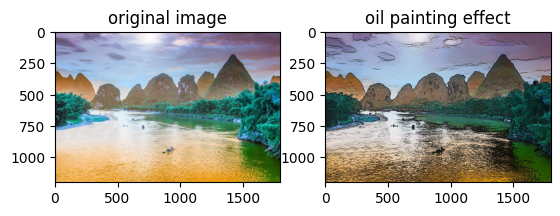

In [4]:
#show oil_painting_effect and original image 
import matplotlib.pyplot as plt 
plt.subplot(1,2,1) 
plt.imshow(cv2.imread(input_file))
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(cv2.imread(output_file)) 
plt.title('oil painting effect')
plt.show()
 

In [5]:
def apply_watercolor_effect(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)
    
    # Check if image is loaded
    if original_image is None:
        print("Can't read the image file.")
        return
    
    # Step 1: Bilateral Filter for smoothing
    watercolor_effect = cv2.bilateralFilter(original_image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Step 2: Edge Enhancement - Find edges and dilate them to reduce their prominence
    edges = cv2.adaptiveThreshold(cv2.cvtColor(watercolor_effect, cv2.COLOR_BGR2GRAY), 255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    watercolor_effect = cv2.bitwise_and(watercolor_effect, cv2.bitwise_not(edges))
    
    # Step 3: Color Saturation - Convert to HSV and boost saturation
    hsv = cv2.cvtColor(watercolor_effect, cv2.COLOR_BGR2HSV)
    hsv[:, :, 1] = cv2.add(hsv[:, :, 1], 15)
    watercolor_effect = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    # Step 4: (Optional) Texture Overlay
    # You would need a texture image for this step. 
    # If you have a texture image, you can overlay it using a blend operation.
    # texture = cv2.imread(texture_image_path, cv2.IMREAD_GRAYSCALE)
    # texture = cv2.resize(texture, (original_image.shape[1], original_image.shape[0]))
    # watercolor_effect = cv2.addWeighted(watercolor_effect, 0.5, cv2.cvtColor(texture, cv2.COLOR_GRAY2BGR), 0.5, 0)

    # Save the final image
    cv2.imwrite(output_image_path, watercolor_effect)

    print(f"Saved: {output_image_path}")



In [6]:
#convert to watercolor effect 
input_file = 'mountain.jpg'  # change to your image file path 
# where you want to save the output 
output_file = 'watercolor_effect.jpg' 
apply_watercolor_effect(input_file, output_file) 

Saved: watercolor_effect.jpg


In [10]:

def apply_watercolorv2(input_image_path, output_image_path):
    # Read the image
    original_image = cv2.imread(input_image_path)
    
    # Check if image is loaded
    if original_image is None:
        print("Can't read the image file.")
        return
    
    # Step 1: Bilateral Filter for smoothing while preserving edges
    watercolor_effect = cv2.bilateralFilter(original_image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Step 2: Additional Smoothing for the background
    # Increase the filter size for more background smoothing
    smoothed_background = cv2.bilateralFilter(original_image, d=15, sigmaColor=100, sigmaSpace=100)
    
    # Step 3: Create a mask for the main subject (edges)
    edges = cv2.adaptiveThreshold(cv2.cvtColor(watercolor_effect, cv2.COLOR_BGR2GRAY), 255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)
    mask = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    mask = cv2.bitwise_not(mask)
    
    # Step 4: Blend the smoothed background with the main subject
    watercolor_effect = cv2.bitwise_and(watercolor_effect, mask)
    smoothed_background = cv2.bitwise_and(smoothed_background, cv2.bitwise_not(mask))
    watercolor_effect = cv2.add(watercolor_effect, smoothed_background)
    
    # Step 5: Color Saturation - Convert to HSV and boost saturation
    hsv = cv2.cvtColor(watercolor_effect, cv2.COLOR_BGR2HSV)
    hsv[:, :, 1] = cv2.add(hsv[:, :, 1], 15)
    watercolor_effect = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    # Save the final image
    cv2.imwrite(output_image_path, watercolor_effect)

    print(f"Saved: {output_image_path}")


In [9]:
#convert to watercolor v2 effect 
input_file = 'mountain.jpg'  # change to your image file path 
# where you want to save the output
output_file = 'watercolor_effect_v2.jpg' 
apply_watercolorv2(input_file, output_file)

NameError: name 'apply_watercolor_effect_with_smooth_background_v2' is not defined